<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Greedy Algorithms </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from util import get_metro_graph, draw_metro_graph, get_path_subgraph

En esta práctica estudiaremos los algoritmos greedy, que se basan en seguir una heurística consistente en escoger la opción óptima en cada paso local con la esperanza de llegar a una solución general óptima.

El siguiente ejemplo ilustra un problema típico que podemos resolver de una forma óptima con una heurística. El problema se define por un conjunto de monedas S, y una cantidad K a la que queremos llegar con ese conjunto de monedas (__Cashier's Problem__). 

In [2]:
def cambio(importe):
    # Definimos el valor de los billetes y monedas disponibles: 500€, 200€, 100€...
    value = [50000,20000,10000,5000,2000,1000,500,200,100,50,20,10,5,2,1]
    
    # Creamos el array vacio para la solución
    distribucion = np.zeros(15).astype(int)
    
    importe = importe*100
    
    for i in range(15):
        # El numero de elementos de cada valor lo definimos con la división entera: importe/valor
        distribucion[i] = importe/value[i]
        # El importe acomulado pasa a ser el modulo de la división anterior
        importe %= value[i]
        
    return list(distribucion)

El algoritmo anterior, propuesto para un número infinito de monedas y billetes de cada tipo muestra como efectivamente, la decisión que tomamos en cada paso del algoritmo pertenece a la solución del problema.

In [3]:
def fancyprint(arr):
    assert type(arr) == list and len(arr) == 15
    curr = ["billete<s> de 500€","billete<s> de 200€","billete<s> de 100€","billete<s> de 50€","billete<s> de 20€",
        "billete<s> de 10€","billete<s> de 5€","moneda<s> de 2€","moneda<s> de 1€","moneda<s> de 50cts",
        "moneda<s> de 20cts","moneda<s> de 10cts","moneda<s> de 5cts","moneda<s> de 2cts","moneda<s> de 1cts"]
    for i in range(len(arr)):
        if arr[i] == 0:
            continue
        if arr[i] == 1:print "- ", arr[i], curr[i].replace("<s>", "")
        else: print "- ", arr[i], curr[i].replace("<s>", "s")
            
fancyprint(cambio(991.35))

-  1 billete de 500€
-  2 billetes de 200€
-  1 billete de 50€
-  2 billetes de 20€
-  1 moneda de 1€
-  1 moneda de 20cts
-  1 moneda de 10cts
-  1 moneda de 5cts


<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Calculador de horarios</p></h2>
  
  <div class="row">
  <div class="col-sm-9">
  <p style="text-align: justify; padding-right: 30px">
  En este ejercicio nos disponemos a elaborar los horarios de los conductores de metro. Supongamos que los periodos de trabajo son de <b>35'</b>, <b>20'</b>, <b>15'</b> y <b>30'</b> durante las dos horas de hora punta y que el tiempo mínimo de descanso entre periodo y periodo es de <b>5'</b>.
  </p>
    <p style="text-align: justify; padding-right: 30px">
  Al final de la ejecución del programa querremos saber cuánto tiempo han estado los trenes parados (Es decir, cuanto tiempo ha pasado un tren sin conductor) y cuantos periodos de los conductores han quedado sin usar. 
  </p>
  </div>
  <div class="col-sm-3">
  <img src="img/work.jpg"></img>
  </div>



<div class="alert alert-warning" style="width:90%; margin:0 auto;">
    <h2><p>Ejemplo de ejecución</p></h2>

    <div class="row">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (1) Iniciamos la ejecución del código con la lista de los periodos pendientes en cada uno de los conductores llena. 
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/0.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (2) Añadimos driver1 a train1 por un periodo de 15' y a driver2 a train2 por un periodo de 20'
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/1.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (3) Cuando driver1 acaba su periodo en train1 no hay ningún conductor disponible para ocupar su posición, así que tenemos que esperar los 5' del periodo de descanso y luego volvemos a añadir driver1 a train1
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/3.png"></img>
        </div>
    </div>
    <div class="row" style="padding-top:30px;">
        <div class="col-sm-5">
            <p style="text-align: justify; padding-right: 30px">
                (N) A lo largo de las N iteraciones vamos colocando el conductor libre en el tren libre durante un periodo de tiempo determinado, respetando los periodos de descanso. Cuando hemos acabado tenemos que: 
                <ul>
                <li>**perdida_trenes = 20'** (5'+5'+5'+5')</li>
                <li>**perdida_conductores = 65'** (30'+35')</li>
                </ul>
            </p>
        </div>
        <div class="col-sm-7">
            <img src="img/5.png"></img>
        </div>
    </div>

</div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__ntrenes__: El numero de trenes.</li>
<li>__mconductores__: El numero de conductores.</li>
<li>__periodos (opt)__: Lista con los periodos definidos en el enunciado.</li>
<li>__descanso (opt)__: Tiempo mínimo de descanso entre periodo y periodo de trabajo.</li>
<li>__tiempo (opt)__: El tiempo total en el que deben de estar en marcha los trenes.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es una tupla que contendrá los valores *( (**int**) perdida_trenes, (**int**) perdida_conductores)* en los cuales cuantificaremos, al final de la ejecución del algoritmo, el tiempo en el que un tren ha estado parado (*perdida_trenes*) y el tiempo que no hemos usado de los conductores (*perdida_conductores*). 

</p>

</div>

In [4]:
def calculador_horarios(ntrenes,mconductores,periodos=[15,20,30,35],descanso=5,tiempo=120):
    drivers=[periodos for i in range(mconductores)]
    interval=tiempo/descanso
    trains=[[5 for i in range(interval)] for j in range(ntrenes)]
    working=[[0 for i in range(interval)] for j in range(mconductores)]
    empty=0
    rest=0
    
    for i in range(interval):
        for j in range(ntrenes):
            if trains[j][i]==5:
                for k in range(mconductores):
                    if working[k][i]==0 and drivers[k]:
                        for l in range(drivers[k][0]/descanso):
                            if(l+i<interval):
                                trains[j][l+i]=0
                                working[k][l+i]=5
                        if(l+i+1<interval):working[k][l+i+1]=1
                        drivers[k].pop(0)
                        
    for i in drivers:
        rest+=sum(i)
    
    for i in trains:
            empty+=sum(i)
    return (empty, rest)

calculador_horarios(2,2)

(155, 0)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> 

</div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. ¿Cómo habéis implementado la función?
#### 2. ¿En que configuración de _ntrenes_ y _mconductores_ obtenéis mejores resultados?
#### 3. Análisis de complejidad de vuestra implementación
#### 4. _(Opcional)_ Comentarios extra y pruebas realizadas con otras configuraciones de periodos, descanso y tiempo.

## (Podéis contestar las preguntas en este mismo bloque)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Calculador de ruta</p></h2>
  
  <div class="row">
  <div class="col-sm-9">
  <p style="text-align: justify; padding-right: 30px">
  Ahora queremos volver a calcular el camino mínimo entre dos estaciones de metro utilizando un algoritmo voraz. La restricción en este caso es que cualquier nodo que visitemos tendrá que formar parte del camino final, así que tendremos que definir una política que nos permita escoger el "mejor" vecino del nodo actual.
  </p>
    <p style="text-align: justify; padding-right: 30px">
Para la realización de este ejercicio se ha modificado la definición de las estaciones añadiendo la geolocalización de cada una de ellas como atributos de los nodos.
  </p>
  </div>
  <div class="col-sm-3">
  <img src="img/plano.jpg"></img>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta práctica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
<li>... : Podéis añadir más parámetros opcionales en el caso que los necesitéis</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'distance'_ __: La distancia acumulada a lo largo del trayecto
<ul>

</p>

</div>

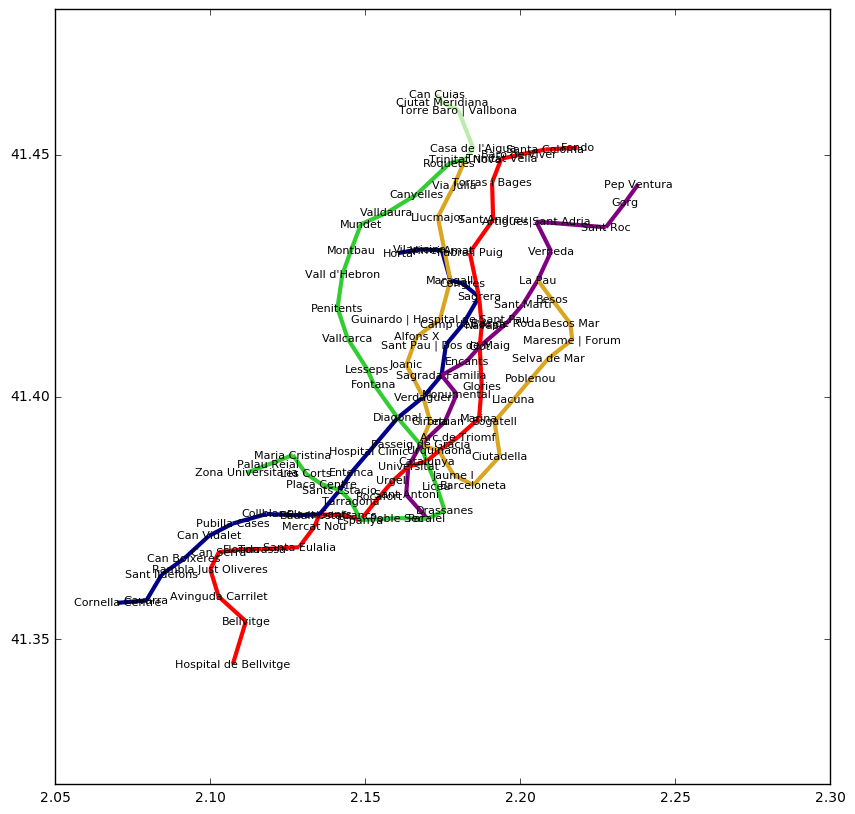

In [5]:
# Carga del fichero CSV con los datos
G = get_metro_graph('csv/lineasmetro.csv')
draw_metro_graph(G, figsize=(10,10))

In [49]:
def calculador_ruta(G, inicio, destino):
    infinite=99999999
    step=0
    #Greed can't stop if a node is impossible to get to, so we will have a limit of iterations
    limit=5*len(G.node)
    temp=[]
    temp.append((inicio,[inicio],0))
    nx.set_node_attributes(G,'DTD',0)
    #To use different heuristics  without having to change a lot of code, we assign it to a variable
    dist_function=pearson
    #Calculate the distance to destiny
    for i in G.node:
        G.node[i]['DTD'] = dist_function(G,i,destino)
    #While we still have options, we keep on with the algorithm
    while step<limit:
        #There will only be a Node every iteration, so we pick it
        curPos,path,cost=temp.pop(0)
        #If we have gotten to the end, we return the current path and cost
        if curPos==destino:
            return {'path' : path,'distance' : cost}
        #Get all neighbors of the current node
        #We don't need to care about any of them being already visited, because its distance to destiny
        #will be really hich compared to a non visited node
        #Also, we need to visit some expanded nodes in case of a dead end or a cicle
        n=[(i,G.node[i]['DTD']) for i in G.neighbors(curPos)]
        #Get the node with minimal distance to our destination
        minPos,distane=min(n,key=lambda n:n[1])
        #Next node to visit will be the one will minimal distance
        #Sum distance between current Node an minimal Node and add the minimal Node to our path
        temp.append((minPos,path+[minPos],cost+int(G.get_edge_data(curPos,minPos)['distance'])))
        #To avoid cicles, the distance of a visited node to the end will raise
        #This way, we have long paths to our destination if there's a dead end, but will get there
        G.node[curPos]['DTD']+=infinite
        step+=1
    print "The algorithm couldn't get to the destination"

#Some easy distance functions we can use
def euc_dist(G,inicio,destino):
    N1=G.node[inicio]
    C1=np.array([N1['latitud'],N1['longitud']])
    N2=G.node[destino]
    C2=np.array([N2['latitud'],N2['longitud']])
    return np.linalg.norm(C2-C1)

def man_dist(G,inicio,destino):
    N1=G.node[inicio]
    C1=np.array([N1['latitud'],N1['longitud']])
    N2=G.node[destino]
    C2=np.array([N2['latitud'],N2['longitud']])
    return sum(abs(C2-C1))

#Just to test, I decided to use Pearson Coeficient
def pearson(G,inicio,destino):
    N1=G.node[inicio]
    C1=np.array([N1['latitud'],N1['longitud']])
    N2=G.node[destino]
    C2=np.array([N2['latitud'],N2['longitud']])
    #corrcoef returns a 2x2 matrix, that compares like:
    #    C1  C2
    #C1 NaN  CP
    #C2  CP NaN
    #
    #In where CP is pearson coeficient of C1 and C2
    d=np.corrcoef(C1,C2)[0][1]
    #Pearson coeficient can be NaN in some cases, so I will use euclidean distance on those cases
    if np.isnan(d):
        return np.linalg.norm(C2-C1)
    return d

calculador_ruta(G,'Fabra i Puig','Can Cuias')

{'distance': 11098790,
 'path': ['Fabra i Puig',
  'Sagrera',
  'Congres',
  'Maragall',
  'Virrei Amat',
  'Vilapicina',
  'Horta',
  'Vilapicina',
  'Virrei Amat',
  'Maragall',
  'Llucmajor',
  'Via Julia',
  'Trinitat Nova',
  "Casa de l'Aigua",
  'Torre Baro | Vallbona',
  'Ciutat Meridiana',
  'Can Cuias']}

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### En esta sección debéis responder a las preguntas siguientes:
#### 1. ¿Cómo habéis implementado la función?
Dado que greedy no es capaz de dar un camino 100% optimo (debido a que no ve más allá de el paso en el que se encuentra)
he decidido hacer una implementación similar al BFS de la practica anterior, teniendo en cuenta que el unico nodo que añadire a mi lista "temp" sera aquel que mi función ordenadora diga que esta a distancia minima.

Para evitar ciclos y "calles sin salida" he decidido cambiar la distancia del nodo sobre el cual estoy iterando a un valor muy superior al del original, de manera que, cuando vuelva hacia atras o el ciclo retorne a un cruce, sea capaz de elegir el nodo que anteriormente no tenia distancia minima. De ese modo, pese a llegar a ser redundante en muchos casos, siempre sera capaz de devolver un camino desde el origen hasta el destino, exceptuando casos en los que el nodo este aislado y sea imposible llegar hasta el.

#### 2. ¿La solución retorna un camino óptimo?
No, dado que, como he comentado antes, greedy no suele dar un camino optimo. Para que retornara un camino optimo, la heuristica deberia ser muy compleja y especifica para el problema que intentamos resolver.

#### 3. Análisis de complejidad de vuestra implementación
Para el analisis de la complejidad, hemos de tener en cuenta que este algoritmo calcula, para cada caso, la distancia de cada nodo al destino, por lo que dicho calculo tiene una complejidad de O(n).
Por lo que respecta al resto del algoritmo, el bucle se repetira 5n veces, dado que es el limite que hemos establecido como maximo, por lo cual, tendra una complejidad O(n).

Conseguir los vecinos de un nodo tiene coste constante, ya que la diferencia entre que tenga 1...5 vecinos es muy baja.
Encontrar la distancia minima usando "min" tiene coste O(n), pero dado que numero de elementos de "n" rondara siempre valores entre 1 y 5, podemos considerar que el coste sera O(1).
Tanto el append como el pop tendran coste O(1) siempre, ya que temp tendra siempre un unico elemento.

Juntando los costes anteriores, tenemos que el coste del bucle es de O(1) que, al repetirse n veces, nos da un coste O(n), el cual coincide con la definicion de un algoritmo greedy.

#### 4. _(Opcional)_ Comentarios extra y pruebas de optimalidad/eficiencia realizadas contra BFS o Dijkstra


<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y las secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>

<p>
Este fichero es la parte 2/2 de la práctica, correspondiente a algoritmos greedy.
</p>